In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../'))
import utils.parse_data as parse


%load_ext autoreload
%autoreload 2

In [3]:
sns.set_theme(
    style='ticks',
    font_scale=1.0,
    rc={'axes.labelsize': 10,
        'axes.titlesize': 11,
        'savefig.transparent': True,
        'legend.title_fontsize': 11,
        'legend.fontsize': 10,
        'legend.borderpad': 0.2,
        'figure.titlesize': 11,
        'figure.subplot.wspace': 0.1,
        })

In [4]:
usecols = [
    'model_id', 'domain_id',
       'num_samples', 'num_parameters', 'max_steps', 'run_number',
       'sequence_length', 'n_embd', 'epochs',
       'best_val_full_loss', 'best_val_full_loss_step', 'best_val_choice_loss',
       'best_val_choice_loss_step', 'best_val_reward_loss',
       'best_val_reward_loss_step'
]

model_summary = pd.read_csv('../model_summary.csv', usecols=usecols)
model_summary.query('sequence_length == 6')

model_summary[['run_number', 'model_id', 'domain_id', 'n_embd']]

,run_number,model_id,domain_id,n_embd
0,3.0,l1_h1_e100_c6_d4,C,4.0
1,1.0,l1_h1_e100_c6_d4,A,4.0
2,NaN,0,NaN,NaN
3,4.0,l1_h1_e100_c6_d4,B_not_sticky,4.0
4,6.0,l2_h2_e100_c6_d8,NaN,8.0
...,...,...,...,...
97,100.0,l1_h1_e100_c24_d8,B_not_sticky,8.0
98,101.0,l1_h1_e100_c24_d16,A,16.0
99,102.0,l1_h1_e100_c24_d16,B,16.0
100,103.0,l1_h1_e100_c24_d16,C,16.0


In [5]:
model_summary.at[2, 'model_id'] = 'l1_h1_e100_c6_d4'

In [6]:
model_summary['n_layers'] = model_summary['model_id'].apply(lambda x: x.split('_')[0][1:] if not x is None else None)
model_summary['n_heads'] = model_summary['model_id'].apply(lambda x: x.split('_')[1][1:] if not x is None else None)

In [29]:
model_summary.query('run_number == 52')

,model_id,domain_id,num_samples,num_parameters,max_steps,run_number,sequence_length,n_embd,epochs,best_val_full_loss,best_val_full_loss_step,best_val_choice_loss,best_val_choice_loss_step,best_val_reward_loss,best_val_reward_loss_step,n_layers,n_heads
54,l4_h2_e100_c48_d32,NaN,9M,52544.0,17600.0,52.0,48.0,32.0,100.0,0.743355,16368.0,0.262453,352.0,0.642836,528.0,4,2


In [32]:
model_summary.query('domain_id.isna()')['best_val_full_loss'].min()

0.7433547377586365

In [30]:
model_summary.query('n_heads == "2" & n_layers == "4"')

,model_id,domain_id,num_samples,num_parameters,max_steps,run_number,sequence_length,n_embd,epochs,best_val_full_loss,best_val_full_loss_step,best_val_choice_loss,best_val_choice_loss_step,best_val_reward_loss,best_val_reward_loss_step,n_layers,n_heads
33,l4_h2_e100_c6_d4,NaN,9M,1024.0,19200.0,37.0,6.0,4.0,100.0,0.777129,19200.0,0.242325,960.0,0.678293,19200.0,4,2
34,l4_h2_e100_c6_d8,NaN,9M,3584.0,19250.0,38.0,6.0,8.0,100.0,0.779263,19250.0,0.238409,768.0,0.669408,1728.0,4,2
35,l4_h2_e100_c6_d16,NaN,9M,13312.0,19250.0,39.0,6.0,16.0,100.0,0.774800,19250.0,0.241605,384.0,0.670970,0.0,4,2
39,l4_h2_e100_c6_d32,NaN,9M,51200.0,19250.0,40.0,6.0,32.0,100.0,0.778009,19250.0,0.252881,384.0,0.620366,192.0,4,2
40,l4_h2_e100_c12_d4,NaN,9M,1048.0,19000.0,41.0,12.0,4.0,100.0,0.767410,18810.0,0.263280,950.0,0.594665,950.0,4,2
41,l4_h2_e100_c12_d8,NaN,9M,3632.0,18950.0,42.0,12.0,8.0,100.0,0.762985,18711.0,0.240059,756.0,0.685743,1323.0,4,2
42,l4_h2_e100_c12_d16,NaN,9M,13408.0,18950.0,43.0,12.0,16.0,100.0,0.760847,18900.0,0.248640,378.0,0.668673,567.0,4,2
43,l4_h2_e100_c12_d32,NaN,9M,51392.0,19000.0,44.0,12.0,32.0,100.0,0.765506,18620.0,0.252484,380.0,0.614705,380.0,4,2
44,l4_h2_e100_c24_d4,NaN,9M,1096.0,18500.0,45.0,24.0,4.0,100.0,0.769512,18500.0,0.243718,1110.0,0.686728,925.0,4,2
45,l4_h2_e100_c24_d8,NaN,9M,3728.0,18450.0,46.0,24.0,8.0,100.0,0.763032,18450.0,0.244062,736.0,0.666041,1472.0,4,2


<Axes: xlabel='n_embd', ylabel='best_val_full_loss'>

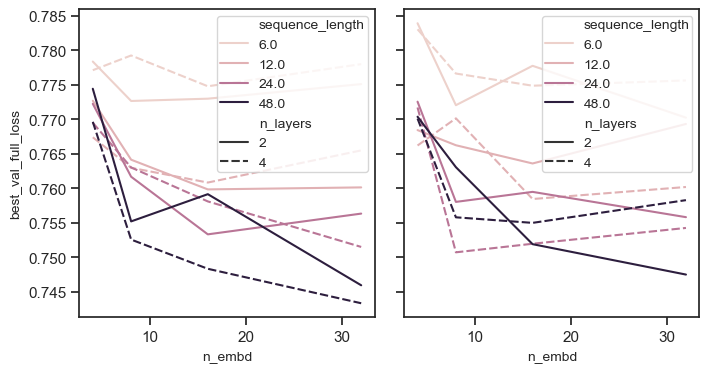

In [7]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
sns.lineplot(data=model_summary.query('run_number > 4 & n_heads == "2"'), x='n_embd', y='best_val_full_loss', hue='sequence_length', style='n_layers', ax=axs[0])
sns.lineplot(data=model_summary.query('run_number > 4 & n_heads == "4"'), x='n_embd', y='best_val_full_loss', hue='sequence_length', style='n_layers', ax=axs[1])

In [10]:
model_summary.query('domain_id.isin(["A", "B", "C"]) & run_number > 5 & sequence_length==6')

,model_id,domain_id,num_samples,num_parameters,max_steps,run_number,sequence_length,n_embd,epochs,best_val_full_loss,best_val_full_loss_step,best_val_choice_loss,best_val_choice_loss_step,best_val_reward_loss,best_val_reward_loss_step,n_layers,n_heads
68,l1_h1_e100_c6_d8,C,9M,968.0,19200.0,75.0,6.0,8.0,100.0,0.864457,19200.0,0.255950,576.0,0.684621,0.0,1,1
70,l1_h1_e100_c6_d8,A,9M,968.0,19200.0,73.0,6.0,8.0,100.0,0.630556,19200.0,0.234037,768.0,0.558144,768.0,1,1
71,l1_h1_e100_c6_d16,C,9M,3472.0,19150.0,79.0,6.0,16.0,100.0,0.864316,19150.0,0.246539,382.0,0.687596,191.0,1,1
72,l1_h1_e100_c6_d16,A,9M,3472.0,19200.0,77.0,6.0,16.0,100.0,0.631439,19200.0,0.242901,576.0,0.530896,576.0,1,1
73,l1_h1_e100_c6_d4,B,9M,292.0,19250.0,70.0,6.0,4.0,100.0,0.771590,19200.0,0.239003,960.0,0.661783,19008.0,1,1
74,l1_h1_e100_c6_d16,B,9M,3472.0,19250.0,78.0,6.0,16.0,100.0,0.768199,19200.0,0.228131,384.0,0.667509,576.0,1,1
75,l1_h1_e100_c6_d4,A,9M,292.0,19150.0,69.0,6.0,4.0,100.0,0.640174,19100.0,0.257853,955.0,0.520916,955.0,1,1
76,l1_h1_e100_c6_d8,B,9M,968.0,19200.0,74.0,6.0,8.0,100.0,0.765465,19200.0,0.246602,960.0,0.623197,768.0,1,1


In [13]:
import interp_helpers as interp
import torch
vocab = ['R', 'r', 'L', 'l']
stoi = {ch: i for i, ch in enumerate(vocab)}
device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')
T = 6


/Users/celiaberon/GitHub/Transformers_for_Modeling_Decision_Sequences/interpretability/interp_helpers.py:379: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


Text(0.5, 0.98, 'Similarity Matrix (ordered by hierarchical clustering of first run)')

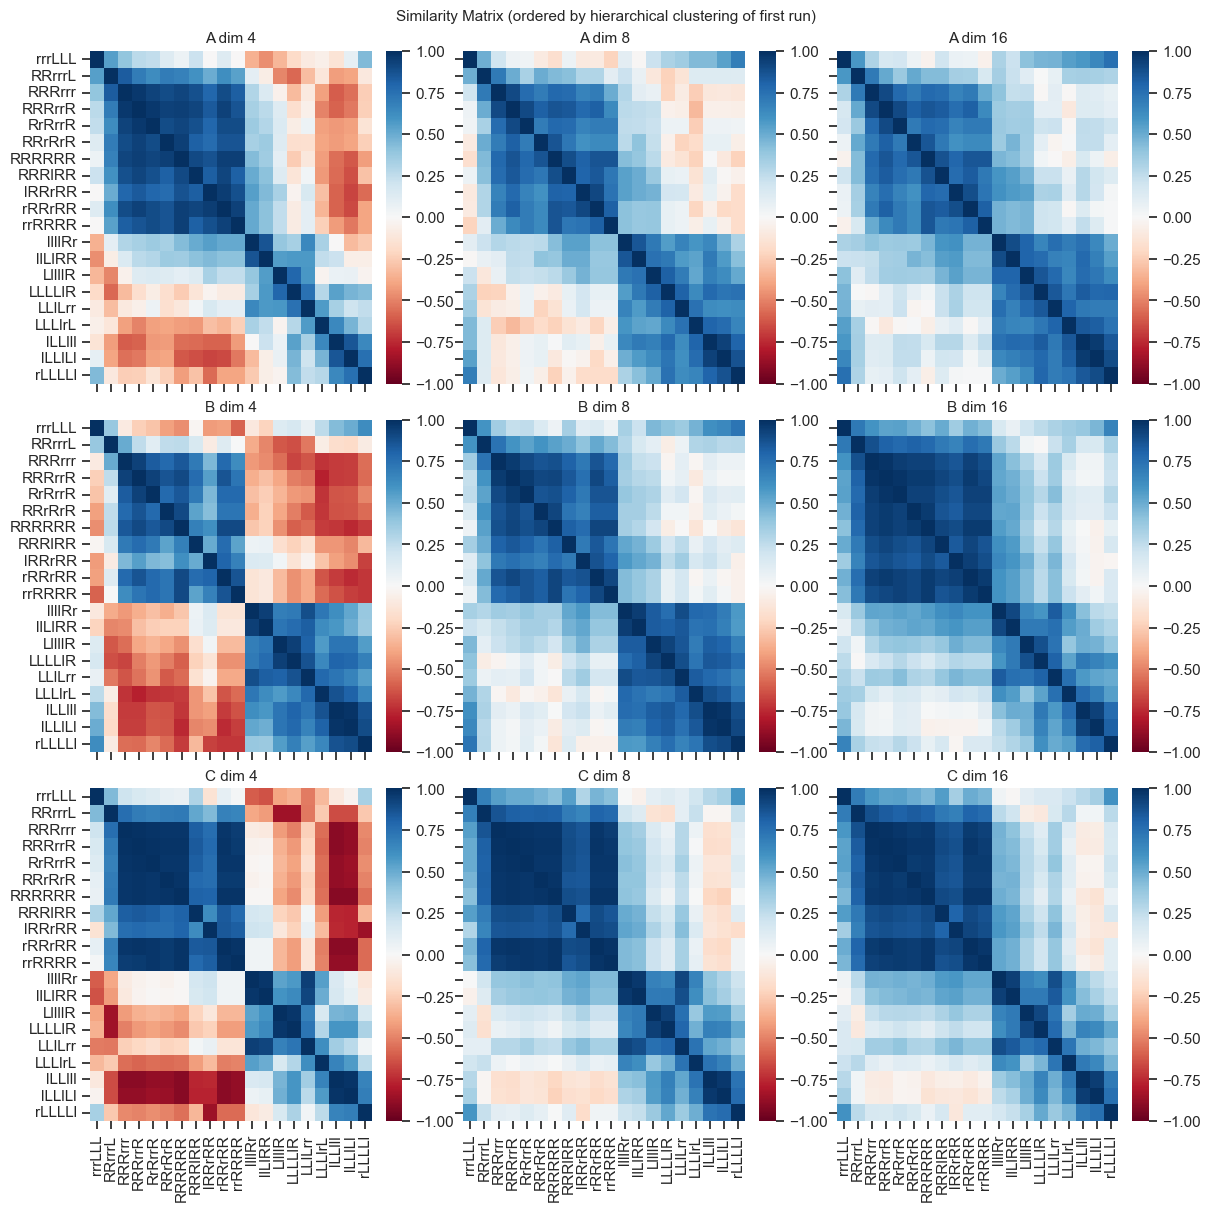

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12),
                        layout='constrained', sharex=True, sharey=True)

# usable_runs = [36, 37, 38, 48, 49, 50, 60, 61, 62]
# A, n_embd
usable_runs = [69, 73, 77, 70, 74, 78, 71, 75, 79]
if not usable_runs:
    runs = [int(run.split('_')[1]) for run in os.listdir('../experiments') if run != '.DS_Store']

    for run in runs:
        model, model_info, config = parse.load_trained_model(run, model_name=None, device=device, weights_only=False)
        if T == model_info['dataloader']['Sequence length (T)']:
            usable_runs.append(run)
usable_runs = sorted(usable_runs)

# events = parse.parse_simulated_data(*parse.get_data_filenames(usable_runs[0], suffix='v'))
# events = parse.add_sequence_columns(events, T)
# vc = events[f'seq{T}_RL'].value_counts()

for i, (run, ax) in enumerate(zip(usable_runs, axs.T.ravel())):

    model, model_info, config = parse.load_trained_model(run, model_name=None, device=device, weights_only=False)

    assert T == model_info['dataloader']['Sequence length (T)'], f"Sequence length mismatch for run {run}"

    if i == 0:  # Use same sequences for all models
        sequences = vc[vc > 200].sample(n=20).index
        _, similarities = interp.sequence_embedding_similarity(model, sequences, stoi)
        ordered_sequences, ordered_sim_matrix, _ = interp.cluster_sequences_hierarchical(similarities, sequences, replot=False, is_similarity=True)
    else:
        _, ordered_sim_matrix = interp.sequence_embedding_similarity(model, ordered_sequences, stoi)

    fig, ax = interp.plot_similarity(ordered_sim_matrix, ordered_sequences, fig=fig, ax=ax)
    if run != 71:
        domain = model_summary.query('run_number == @run')['domain_id'].item()
        n_embd = int(model_summary.query('run_number == @run')['n_embd'].item())
    else:
        domain='C'
        n_embd = 4
    ax.set(title=f'{domain} dim {n_embd}')

fig.suptitle('Similarity Matrix (ordered by hierarchical clustering of first run)')

In [20]:
int(model_summary.query('run_number == @run')['n_embd'].item())

4

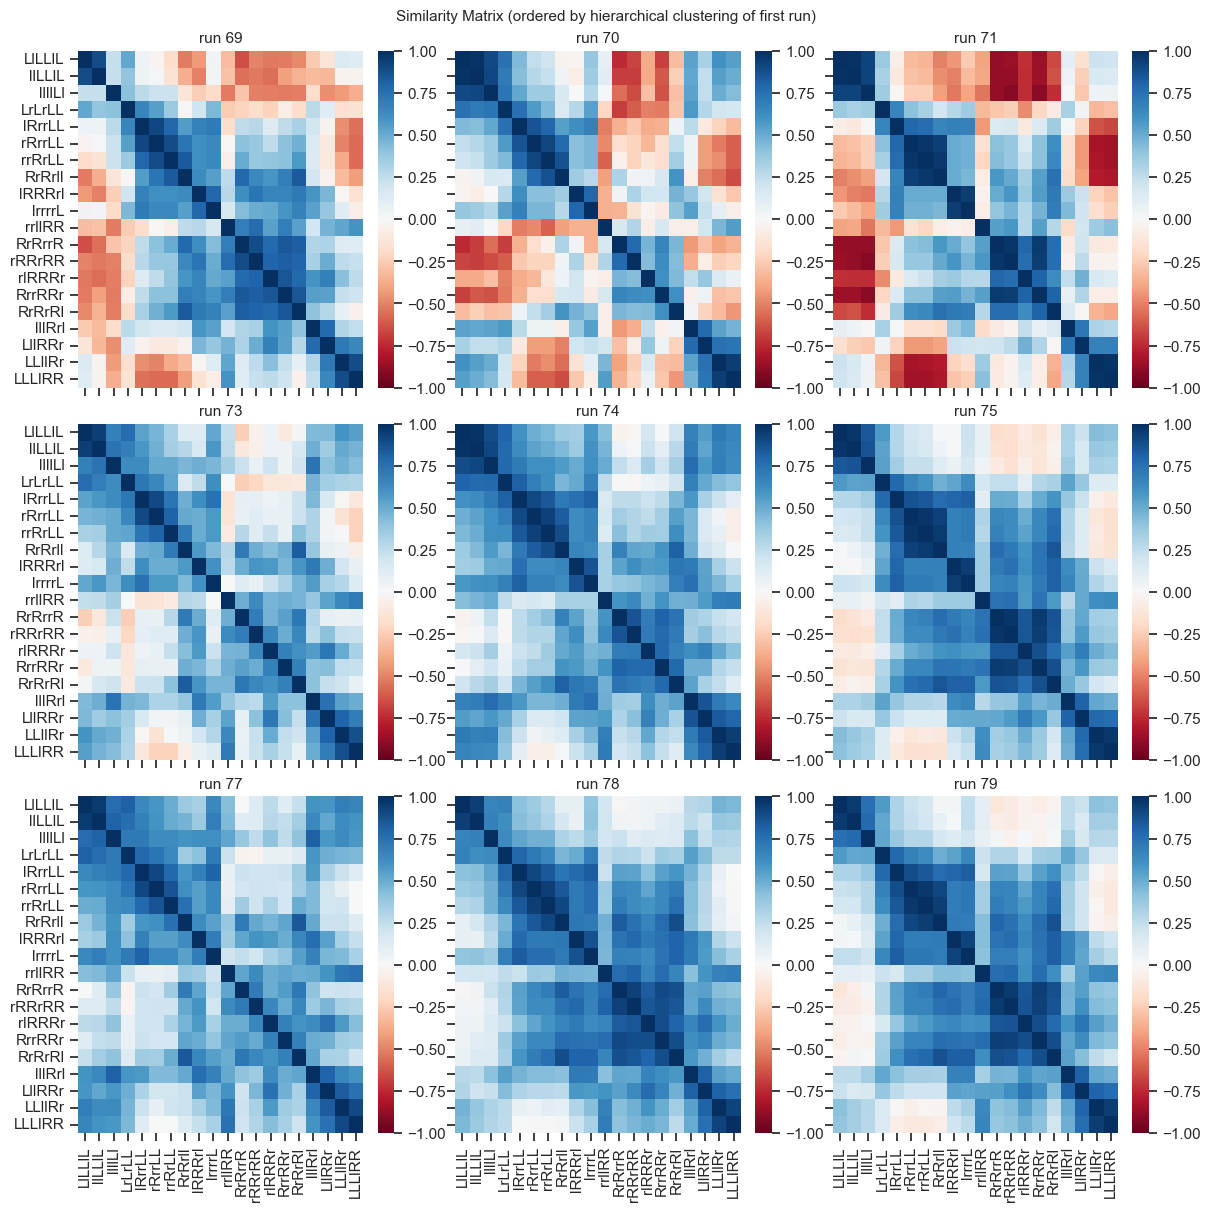

In [18]:
fig